In [0]:
# Without data augmentation

import numpy as np
from matplotlib import pyplot as plt
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D, Dropout, BatchNormalization
from keras.models import Sequential
from keras.utils import np_utils
from keras import regularizers
from keras.callbacks import LearningRateScheduler

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
n_examples = 50000

In [0]:
X1_train = []
X1_test = []
X2_train = []
X2_test = []
Y1_train = []
Y1_test = []
Y2_train = []
Y2_test = []

In [0]:
for ix in range(n_examples):
    if y_train[ix] < 5:
        # put data in set 1
        X1_train.append(x_train[ix]/255.0)
        Y1_train.append(y_train[ix])
    else:
        # put data in set 2
        X2_train.append(x_train[ix]/255.0)
        Y2_train.append(y_train[ix])

In [0]:
for ix in range(y_test.shape[0]):
    if y_test[ix] < 5:
        # put data in set 1
        X1_test.append(x_test[ix]/255.0)
        Y1_test.append(y_test[ix])
    else:
        # put data in set 2
        X2_test.append(x_test[ix]/255.0)
        Y2_test.append(y_test[ix])

In [0]:
X1_train = np.asarray(X1_train).reshape((-1, 32, 32, 3))
X1_test = np.asarray(X1_test).reshape((-1, 32, 32, 3))
X2_train = np.asarray(X2_train).reshape((-1, 32, 32, 3))
X2_test = np.asarray(X2_test).reshape((-1, 32, 32, 3))

In [0]:
nb_classes = 5
Y1_train = np_utils.to_categorical(np.asarray(Y1_train), nb_classes)
Y1_test = np_utils.to_categorical(np.asarray(Y1_test), nb_classes)

nb_classes = 10
Y2_train = np_utils.to_categorical(np.asarray(Y2_train), nb_classes)
Y2_test = np_utils.to_categorical(np.asarray(Y2_test), nb_classes)

In [0]:
print(X1_train.shape, X1_test.shape)
print(Y1_train.shape, Y1_test.shape)
print(X2_train.shape, X2_test.shape)
print(Y2_train.shape, Y2_test.shape)

(25000, 32, 32, 3) (5000, 32, 32, 3)
(25000, 5) (5000, 5)
(25000, 32, 32, 3) (5000, 32, 32, 3)
(25000, 10) (5000, 10)


In [0]:
split1 = int(0.8 * X1_train.shape[0])
split2 = int(0.8 * X2_train.shape[0])

In [0]:
x1_val = X1_train[split1:]
x1_train = X1_train[:split1]
y1_val = Y1_train[split1:]
y1_train = Y1_train[:split1]

In [0]:
x2_val = X2_train[split2:]
x2_train = X2_train[:split2]
y2_val = Y2_train[split2:]
y2_train = Y2_train[:split2]


In [0]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

In [0]:
  batch_size = 64
  epochs = 10
  data_augmentation = True
  weight_decay = 1e-4

  model = Sequential()                                                                                 # base model
  model.add(Conv2D(32, kernel_size=3, strides=(1, 1), input_shape =(32,32,3), activation ='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay) ))     # as the image is in grayscale the shape is 28,28,1 (if rgb = (28,28,3))
                                                                                                       # Conv2D is used for spatial convolution over images, 64 feature maps
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (2,2))) 
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))
  model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.4))
 
  model.add(Flatten())
  model.add(Dense(5, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
  print("\n Model Summary \n")
  model.summary()


 Model Summary 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 

In [0]:
hist = model.fit(x1_train, y1_train,
         nb_epoch=epochs,
         shuffle=True,
         batch_size=batch_size,
         validation_data=(x1_val, y1_val), verbose=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 12s - loss: 1.4194 - acc: 0.5428 - val_loss: 0.9726 - val_acc: 0.6498
Epoch 2/10
 - 10s - loss: 0.9479 - acc: 0.6605 - val_loss: 1.0003 - val_acc: 0.6392
Epoch 3/10
 - 10s - loss: 0.7887 - acc: 0.7248 - val_loss: 1.0109 - val_acc: 0.6624
Epoch 4/10
 - 10s - loss: 0.6948 - acc: 0.7595 - val_loss: 0.8028 - val_acc: 0.7048
Epoch 5/10
 - 10s - loss: 0.6260 - acc: 0.7869 - val_loss: 0.5964 - val_acc: 0.7966
Epoch 6/10
 - 10s - loss: 0.5673 - acc: 0.8056 - val_loss: 0.6404 - val_acc: 0.7892
Epoch 7/10
 - 10s - loss: 0.5280 - acc: 0.8245 - val_loss: 1.1792 - val_acc: 0.6070
Epoch 8/10
 - 10s - loss: 0.4821 - acc: 0.8392 - val_loss: 0.5097 - val_acc: 0.8314
Epoch 9/10
 - 10s - loss: 0.4500 - acc: 0.8557 - val_loss: 0.5912 - val_acc: 0.8114
Epoch 10/10
 - 10s - loss: 0.4307 - acc: 0.8652 - val_loss: 0.5316 - val_acc: 0.8384


In [0]:
for l in model.layers[:19]:
    l.trainable = False   

In [0]:
trans_model = Sequential(model.layers[:19])

trans_model.add(Dense(128))
trans_model.add(Activation('relu'))
trans_model.add(Dense(10))
trans_model.add(Activation('softmax'))

trans_model.summary()
trans_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)       

In [0]:
hist2 = trans_model.fit(x2_train, y2_train, nb_epoch=epochs, shuffle=True, batch_size=batch_size, validation_data=(x2_val, y2_val), verbose=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 6s - loss: 0.6855 - acc: 0.7781 - val_loss: 0.4991 - val_acc: 0.8416
Epoch 2/10
 - 5s - loss: 0.5375 - acc: 0.8260 - val_loss: 0.4782 - val_acc: 0.8486
Epoch 3/10
 - 4s - loss: 0.4922 - acc: 0.8410 - val_loss: 0.4686 - val_acc: 0.8480
Epoch 4/10
 - 4s - loss: 0.4616 - acc: 0.8539 - val_loss: 0.4433 - val_acc: 0.8606
Epoch 5/10
 - 4s - loss: 0.4426 - acc: 0.8587 - val_loss: 0.4489 - val_acc: 0.8568
Epoch 6/10
 - 4s - loss: 0.4252 - acc: 0.8641 - val_loss: 0.4483 - val_acc: 0.8568
Epoch 7/10
 - 4s - loss: 0.4108 - acc: 0.8694 - val_loss: 0.4305 - val_acc: 0.8640
Epoch 8/10
 - 4s - loss: 0.3989 - acc: 0.8746 - val_loss: 0.4338 - val_acc: 0.8624
Epoch 9/10
 - 4s - loss: 0.3814 - acc: 0.8804 - val_loss: 0.4336 - val_acc: 0.8610
Epoch 10/10
 - 4s - loss: 0.3784 - acc: 0.8841 - val_loss: 0.4242 - val_acc: 0.8644



 Model Training 



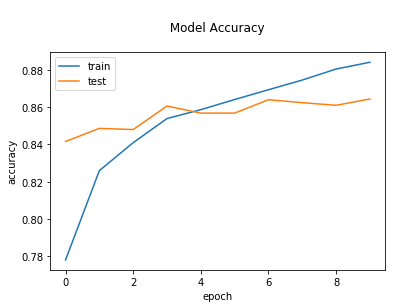

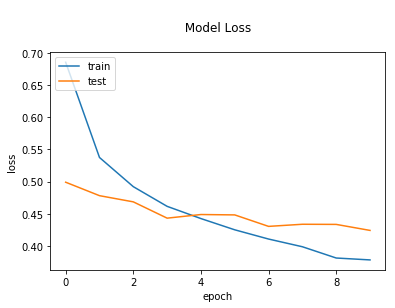

In [0]:
  print("\n Model Training \n")

  plt.plot(hist2.history['acc'])                                                                        # summarize history for accuracy
  plt.plot(hist2.history['val_acc'])
  plt.title('\n Model Accuracy \n')
  plt.ylabel('accuracy') 
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  plt.plot(hist2.history['loss'])                                                                       # summarize history for loss
  plt.plot(hist2.history['val_loss'])
  plt.title('\n Model Loss \n')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [0]:
  acc = trans_model.evaluate(X2_test, Y2_test,verbose=2)                   # Evaluation of model
  print('\n TEST LOSS: ', acc[0])
  print('\n TEST ACCURACY: ',acc[1])
  


 TEST LOSS:  0.41970731101036074

 TEST ACCURACY:  0.8738
